<a href="https://colab.research.google.com/github/vihanpoonia/GEN-AI-CSET419-/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Installing diffusers and torch libraries...')
!pip install diffusers[transformers,accelerate]
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
print('Libraries installed successfully.')

Installing diffusers and torch libraries...
Looking in indexes: https://download.pytorch.org/whl/cu118
Libraries installed successfully.


In [ ]:
labels = [
    "Normal anatomy",
    "Infectious patterns",
    "Lung opacities",
    "Pleural conditions",
    "Structural lesions",
    "Cardiac findings",
    "Medical devices",
    "Imaging artifacts",
    "View and positioning",
    "Domain shift"
]
print(f"Labels defined: {labels}")

Labels defined: ['Normal anatomy', 'Infectious patterns', 'Lung opacities', 'Pleural conditions', 'Structural lesions', 'Cardiac findings', 'Medical devices', 'Imaging artifacts', 'View and positioning', 'Domain shift']


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

print('Loading Stable Diffusion model...')

model_id = 'runwayml/stable-diffusion-v1-5'

# Check if CUDA-enabled GPU is available and set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device == 'cuda' else torch.float32)
pipeline.to(device)

print(f'Stable Diffusion model loaded successfully on {device}.')
print(f'Pipeline device: {pipeline.device}')

Loading Stable Diffusion model...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Stable Diffusion model loaded successfully on cuda.
Pipeline device: cuda:0


Generating and saving images...


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Normal anatomy" at x-ray/Normal anatomy/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Infectious patterns" at x-ray/Infectious patterns/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Lung opacities" at x-ray/Lung opacities/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Pleural conditions" at x-ray/Pleural conditions/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Structural lesions" at x-ray/Structural lesions/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Cardiac findings" at x-ray/Cardiac findings/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Medical devices" at x-ray/Medical devices/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Imaging artifacts" at x-ray/Imaging artifacts/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Generated and saved image for "View and positioning" at x-ray/View and positioning/image.png


  0%|          | 0/50 [00:00<?, ?it/s]

Generated and saved image for "Domain shift" at x-ray/Domain shift/image.png

Displaying generated images:
Label: Normal anatomy


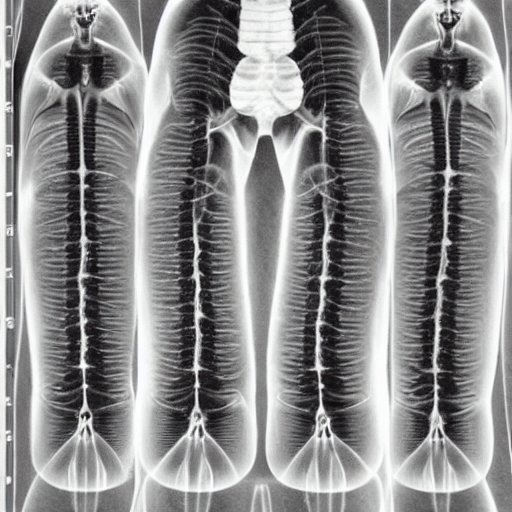

Label: Infectious patterns


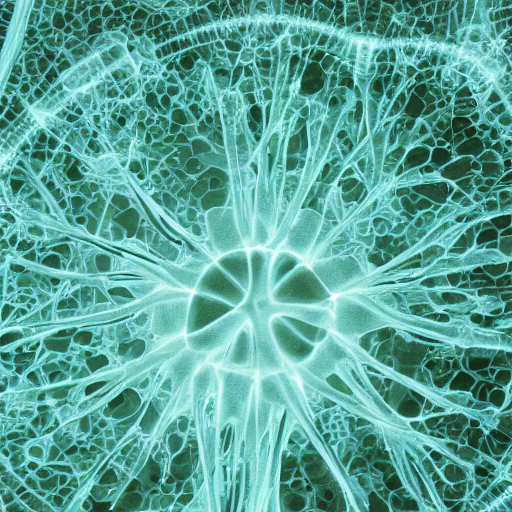

Label: Lung opacities


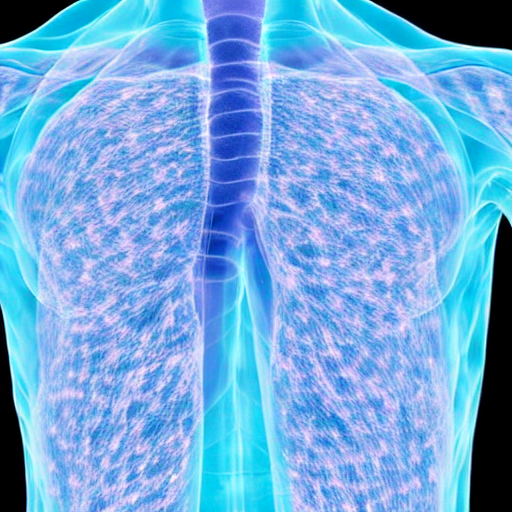

Label: Pleural conditions


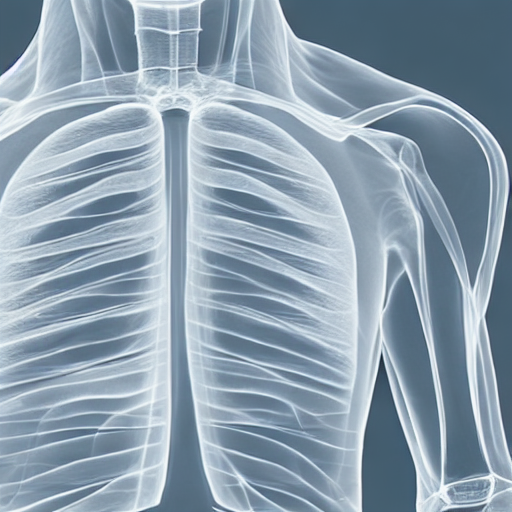

Label: Structural lesions


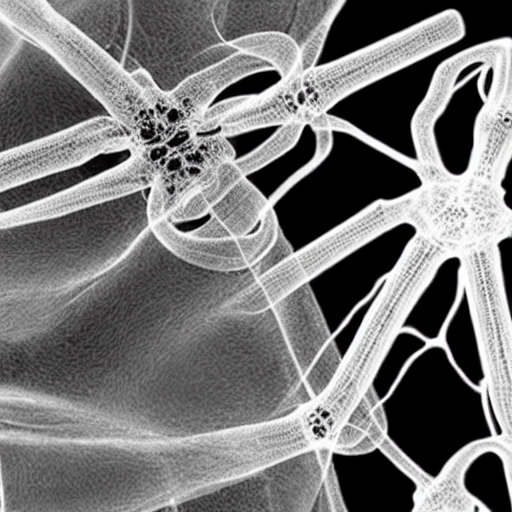

Label: Cardiac findings


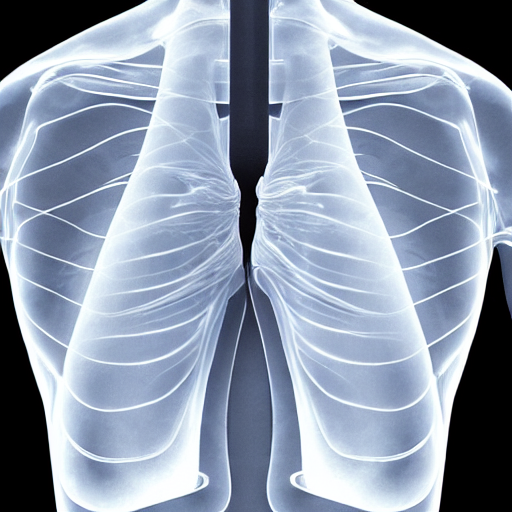

Label: Medical devices


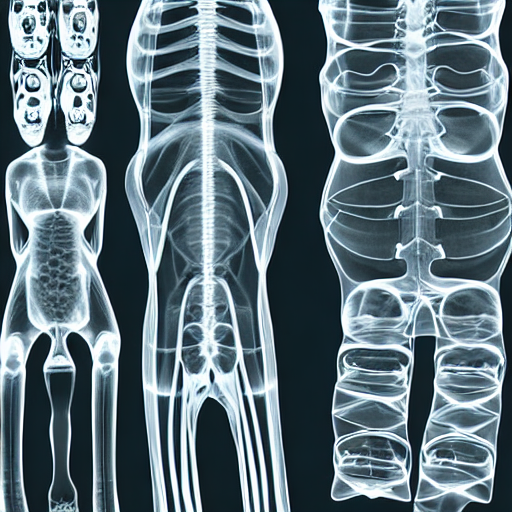

Label: Imaging artifacts


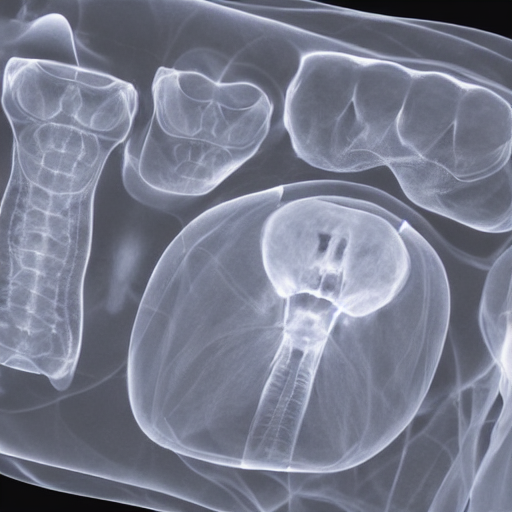

Label: View and positioning


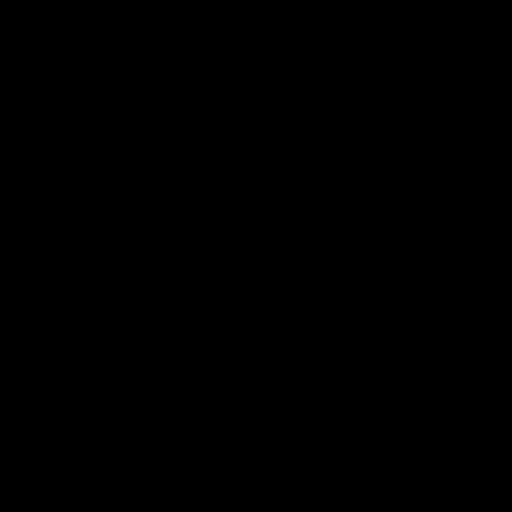

Label: Domain shift


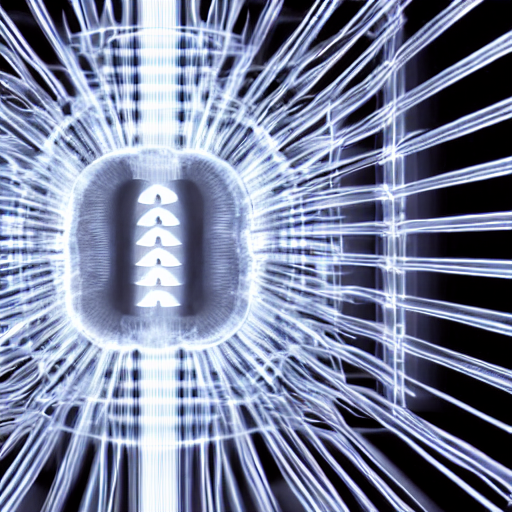

In [ ]:
import os
from IPython.display import display, Image

# Create a directory to store the images
output_dir = 'x-ray'
os.makedirs(output_dir, exist_ok=True)

all_generated_images = []

print('Generating and saving images...')

for label in labels:
    # Create a sub-directory for each label
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    # Generate prompt for the image
    prompt = f'x-ray image of {label}'

    # Generate image
    with torch.no_grad():
        image = pipeline(prompt).images[0]

    # Save the image
    image_path = os.path.join(label_dir, 'image.png')
    image.save(image_path)
    print(f'Generated and saved image for "{label}" at {image_path}')

    all_generated_images.append({'label': label, 'path': image_path})

print('\nDisplaying generated images:')
for img_info in all_generated_images:
    print(f'Label: {img_info["label"]}')
    display(Image(filename=img_info['path']))


In [ ]:
print('Installing kagglehub and pandas libraries...')
!pip install kagglehub
!pip install pandas
print('Libraries installed successfully.')

Installing kagglehub and pandas libraries...
Libraries installed successfully.


In [ ]:
import kagglehub
import pandas as pd
import os

print('Downloading Kaggle Chest X-ray dataset...')
dataset_id = 'paultimothymooney/chest-xray-pneumonia'

# Download the dataset
download_path = kagglehub.dataset_download(dataset_id)
print(f'Dataset downloaded to: {download_path}')

csv_file_path = None
for root, dirs, files in os.walk(download_path):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(root, file)
            break
    if csv_file_path: # If a CSV is found, break outer loop
        break

if csv_file_path:
    print(f'Found CSV file: {csv_file_path}')
    # Load the CSV file into a pandas DataFrame
    df_chest_xray = pd.read_csv(csv_file_path)
    print('\nDataFrame loaded successfully:')
    print(df_chest_xray.head())
    print('\nDataFrame columns:')
    print(df_chest_xray.columns.tolist())
else:
    print('No CSV file found in the downloaded dataset. The dataset might consist only of image files.')
    print('Listing top-level contents of the downloaded dataset:')
    for item in os.listdir(download_path):
        print(os.path.join(download_path, item))

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Dataset downloaded to: /kaggle/input/chest-xray-pneumonia
No CSV file found in the downloaded dataset. The dataset might consist only of image files.
Listing top-level contents of the downloaded dataset:
/kaggle/input/chest-xray-pneumonia/chest_xray


**Reasoning**:
Since no CSV file was found in the downloaded dataset, I will create a pandas DataFrame by walking through the image directories, extracting image paths and their corresponding labels (NORMAL or PNEUMONIA) based on the folder structure, and then display the head and columns of the created DataFrame.



In [ ]:
import pandas as pd
import os

base_dataset_path = os.path.join(download_path, 'chest_xray')

image_data = []

# Define the splits and classes as per the dataset structure
splits = ['train', 'test', 'val']
classes = ['NORMAL', 'PNEUMONIA']

print(f'Creating DataFrame from image files in: {base_dataset_path}')

for split in splits:
    split_path = os.path.join(base_dataset_path, split)
    if os.path.exists(split_path):
        for class_name in classes:
            class_path = os.path.join(split_path, class_name)
            if os.path.exists(class_path):
                for filename in os.listdir(class_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                        image_path = os.path.join(class_path, filename)
                        image_data.append({
                            'filepath': image_path,
                            'label': class_name,
                            'split': split
                        })

# Create the DataFrame
df_chest_xray = pd.DataFrame(image_data)

print('\nDataFrame created successfully. Displaying first 5 rows:')
print(df_chest_xray.head())
print('\nDataFrame columns:')
print(df_chest_xray.columns.tolist())


Creating DataFrame from image files in: /kaggle/input/chest-xray-pneumonia/chest_xray

DataFrame created successfully. Displaying first 5 rows:
                                            filepath   label  split
0  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL  train
1  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL  train
2  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL  train
3  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL  train
4  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL  train

DataFrame columns:
['filepath', 'label', 'split']


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np

print('Defining image transformations...')

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
image_size = 224

transform_train = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform_val_test = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

print('Creating custom PyTorch Dataset class...')

class ChestXrayDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.label_map = {'NORMAL': 0, 'PNEUMONIA': 1}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['filepath']
        image = Image.open(img_path).convert('RGB')
        label_str = self.dataframe.iloc[idx]['label']
        label = self.label_map[label_str]

        if self.transform:
            image = self.transform(image)

        return image, label

print('Instantiating custom Dataset objects for training, validation, and test sets...')

# 4. Instantiate separate custom Dataset objects
train_df = df_chest_xray[df_chest_xray['split'] == 'train']
val_df = df_chest_xray[df_chest_xray['split'] == 'val']
test_df = df_chest_xray[df_chest_xray['split'] == 'test']

train_dataset = ChestXrayDataset(train_df, transform=transform_train)
val_dataset = ChestXrayDataset(val_df, transform=transform_val_test)
test_dataset = ChestXrayDataset(test_df, transform=transform_val_test)

print('Creating DataLoader instances...')

# 5. Create DataLoader instances
batch_size = 32 # Can be adjusted

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f'Train dataset size: {len(train_dataset)} (batches: {len(train_loader)})')
print(f'Validation dataset size: {len(val_dataset)} (batches: {len(val_loader)})')
print(f'Test dataset size: {len(test_dataset)} (batches: {len(test_loader)})')

# Verify one batch
for images, labels in train_loader:
    print(f'Shape of images in a batch: {images.shape}')
    print(f'Shape of labels in a batch: {labels.shape}')
    break

print('Data preprocessing complete and DataLoaders created.')

Defining image transformations...
Creating custom PyTorch Dataset class...
Instantiating custom Dataset objects for training, validation, and test sets...
Creating DataLoader instances...
Train dataset size: 5216 (batches: 163)
Validation dataset size: 16 (batches: 1)
Test dataset size: 624 (batches: 20)
Shape of images in a batch: torch.Size([32, 3, 224, 224])
Shape of labels in a batch: torch.Size([32])
Data preprocessing complete and DataLoaders created.


In [ ]:
import torch.nn as nn
import torchvision.models as models

print('Loading pre-trained DenseNet-121 model...')

# Load a pre-trained DenseNet-121 model
model = models.densenet121(pretrained=True)

print('Freezing pre-trained model parameters...')

# Freeze parameters so we don't backpropagate through them
for param in model.parameters():
    param.requires_grad = False

# Get the number of features in the last layer of the classifier
num_ftrs = model.classifier.in_features

print(f'Replacing classifier layer. Input features: {num_ftrs}, Output features: 2.')

# Replace the classifier layer with a new one for 2 classes (NORMAL, PNEUMONIA)
model.classifier = nn.Linear(num_ftrs, 2)

# Move the model to the appropriate device
model = model.to(device)

print(f'DenseNet-121 model defined and moved to {device}.')
print(model)

Loading pre-trained DenseNet-121 model...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 94.1MB/s]


Freezing pre-trained model parameters...
Replacing classifier layer. Input features: 1024, Output features: 2.
DenseNet-121 model defined and moved to cuda.
DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

In [ ]:
import torch.optim as optim

print('Defining loss function and optimizer...')

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

print('Loss function and optimizer defined.')

Defining loss function and optimizer...
Loss function and optimizer defined.


In [ ]:
print('Starting model training...')

num_epochs = 10 # You can adjust this value

# Track metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train() # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation phase
    model.eval() # Set model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad(): # Disable gradient calculation for validation
        for inputs_val, labels_val in val_loader:
            inputs_val = inputs_val.to(device)
            labels_val = labels_val.to(device)

            outputs_val = model(inputs_val)
            loss_val = criterion(outputs_val, labels_val)

            val_running_loss += loss_val.item()

            _, predicted_val = torch.max(outputs_val.data, 1)
            total_val += labels_val.size(0)
            correct_val += (predicted_val == labels_val).sum().item()

    epoch_val_loss = val_running_loss / len(val_loader)
    epoch_val_accuracy = 100 * correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}: '
          f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.2f}% | '
          f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%')

print('\nModel training complete.')

Starting model training...
Epoch 1/10: Train Loss: 0.2925, Train Acc: 88.59% | Val Loss: 0.2874, Val Acc: 81.25%
Epoch 2/10: Train Loss: 0.1705, Train Acc: 93.62% | Val Loss: 0.2718, Val Acc: 81.25%
Epoch 3/10: Train Loss: 0.1501, Train Acc: 94.10% | Val Loss: 0.1794, Val Acc: 93.75%
Epoch 4/10: Train Loss: 0.1384, Train Acc: 94.90% | Val Loss: 0.1802, Val Acc: 100.00%
Epoch 5/10: Train Loss: 0.1306, Train Acc: 94.98% | Val Loss: 0.1768, Val Acc: 100.00%
Epoch 6/10: Train Loss: 0.1247, Train Acc: 95.28% | Val Loss: 0.2628, Val Acc: 93.75%
Epoch 7/10: Train Loss: 0.1199, Train Acc: 95.26% | Val Loss: 0.1538, Val Acc: 100.00%
Epoch 8/10: Train Loss: 0.1103, Train Acc: 96.09% | Val Loss: 0.2256, Val Acc: 93.75%
Epoch 9/10: Train Loss: 0.1070, Train Acc: 95.86% | Val Loss: 0.1748, Val Acc: 100.00%
Epoch 10/10: Train Loss: 0.1129, Train Acc: 95.55% | Val Loss: 0.1757, Val Acc: 93.75%

Model training complete.
